In [1]:
import sys
import numpy as np
# insert at position 1 in the path, as 0 is the path of this file.
sys.path.insert(1, r'..\modules\\')
import seaborn as sns
import shap
import matplotlib.pyplot as plt
from modelclass import ModelTrainer

# Overview

1. Logistic Classifier Default
2. XGB Classifier Default
3. XGB Classifier feat_eng1
4. XGB Classifier feat_eng2
3. XGB Classifier Resample
4. XGB Hyperparameter Tuning

In [18]:
mt = ModelTrainer(model='xgb',data_loc=r'..\data\feature1.csv')
mt.load_model('xgb6')

[07:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.308781, F-Score=0.659
precision, recall, threshold, f1score attributes updated
Best Threshold=0.070381, G-Mean=0.839
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated


In [19]:
mt.shap

array([[-8.8813864e-02, -5.2175486e-01, -7.1918452e-03, ...,
         8.6924732e-03, -5.4386497e-02,  7.4275129e-04],
       [-9.6702987e-01,  1.3878708e-02, -1.3591076e-01, ...,
        -1.0434943e-03, -2.7263099e-02, -1.5569417e-02],
       [ 1.1996587e-02,  2.6538314e-02, -2.8576641e-03, ...,
         2.9691057e-03,  3.1881731e-02,  2.7681945e-03],
       ...,
       [-2.0441736e-01,  2.7662735e-02, -8.6215986e-03, ...,
         3.3918198e-02,  1.7406255e-02, -2.1421997e-02],
       [-1.5448173e+00,  2.2890965e-02,  4.0488729e-01, ...,
         8.7341592e-03, -2.9978888e-02,  8.6885807e-04],
       [ 5.6183022e-01,  1.7239859e-02,  2.8525494e-04, ...,
        -8.8807465e-05,  1.7687848e-02,  8.1875483e-03]], dtype=float32)

In [20]:
mt.iv.shape

(95379, 130)

In [21]:
len(mt.shap)

19076

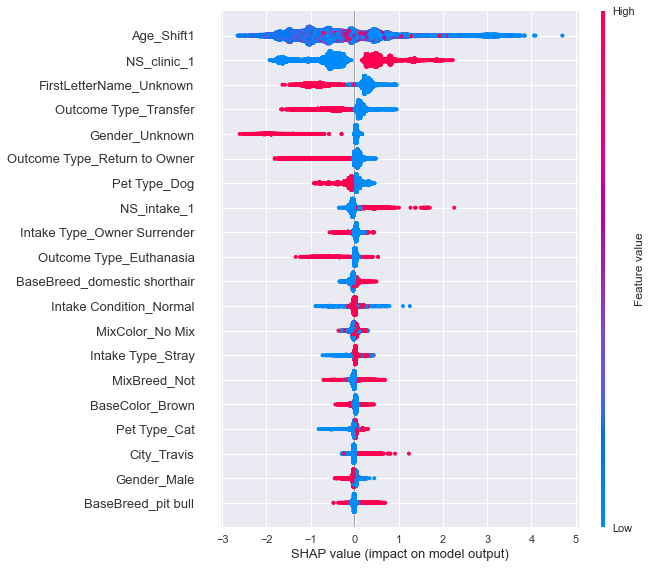

In [22]:
shap.summary_plot(mt.shap, mt.xtest)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


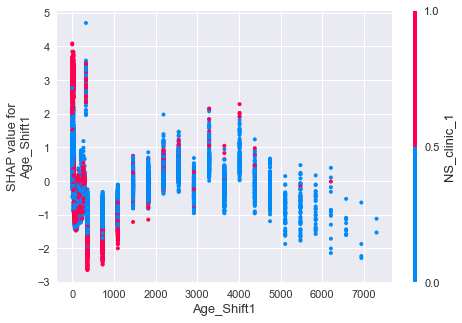

In [24]:
shap.dependence_plot('Age_Shift1', mt.shap, mt.xtest, display_features=mt.xtest)